Cell 1: Imports + Helper Functions

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# ----- Helper Functions -----
def translate(points, tx, ty):
    """Translation of points by tx, ty"""
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return (T @ points.T).T

def scale(points, sx, sy):
    """Scaling of points by sx, sy"""
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return (S @ points.T).T

def rotate(points, angle):
    """Rotation of points by given angle (in degrees)"""
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0, 0, 1]])
    return (R @ points.T).T


Cell 2: Define Shapes

In [12]:
# Example Shapes
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]]) # closed triangle

rectangle = np.array([[0,0,1],
                      [2,0,1],
                      [2,1,1],
                      [0,1,1],
                      [0,0,1]]) # closed rectangle


Exercise 1: Single Transform (Rotation 45° around origin)

Cell 3:

Rotation Matrix (45°):
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Original Vertex: [1. 0. 1.]
Matrix Multiplication:
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]  @  [1. 0. 1.]
Resulting Vertex: [0.70710678 0.70710678 1.        ]

Original Triangle Coordinates:
 [[0.  0.  1. ]
 [1.  0.  1. ]
 [0.5 1.  1. ]
 [0.  0.  1. ]]

Rotated Triangle (45°):
 [[ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  1.        ]
 [-0.35355339  1.06066017  1.        ]
 [ 0.          0.          1.        ]]


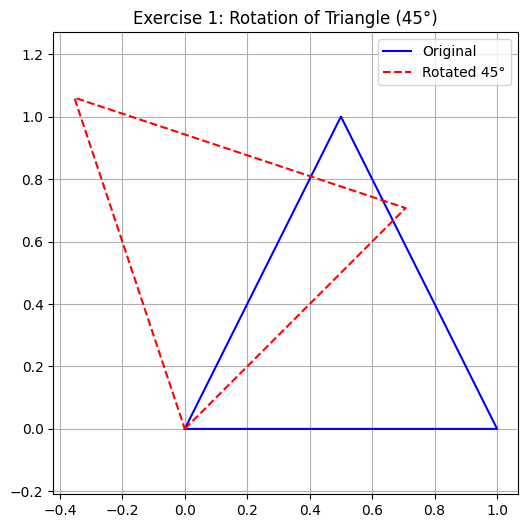

In [13]:
# Rotation function with explicit matrix return
def rotation_matrix(angle):
    rad = np.radians(angle)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad),  np.cos(rad), 0],
                     [0, 0, 1]])

# Define angle
angle = 45
R = rotation_matrix(angle)

print("Rotation Matrix (45°):\n", R)

# Apply rotation
triangle_rot = (R @ triangle.T).T

# Show step-by-step multiplication for one vertex (example: [1,0,1])
vertex = triangle[1]   # second vertex (1,0,1)
print("\nOriginal Vertex:", vertex)
print("Matrix Multiplication:\n", R, " @ ", vertex)

result = R @ vertex
print("Resulting Vertex:", result)

# Print all coordinates
print("\nOriginal Triangle Coordinates:\n", triangle)
print("\nRotated Triangle (45°):\n", triangle_rot)

# Plotting
plt.figure(figsize=(6,6))
plt.plot(triangle[:,0], triangle[:,1], 'b-', label="Original")
plt.plot(triangle_rot[:,0], triangle_rot[:,1], 'r--', label="Rotated 45°")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.title("Exercise 1: Rotation of Triangle (45°)")
plt.show()


Exercise 2: Order Matters (Scaling vs Translation)

Cell 4:

Scale -> Translate:
 [[2.  1.  1. ]
 [6.  1.  1. ]
 [6.  2.5 1. ]
 [2.  2.5 1. ]
 [2.  1.  1. ]]

Translate -> Scale:
 [[4.  1.5 1. ]
 [8.  1.5 1. ]
 [8.  3.  1. ]
 [4.  3.  1. ]
 [4.  1.5 1. ]]


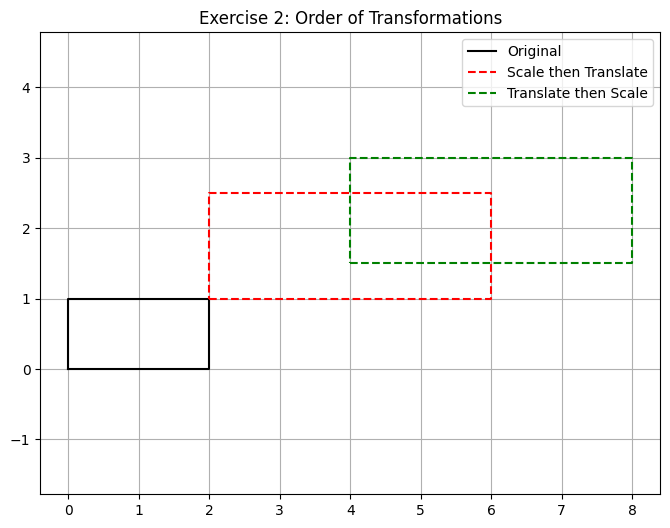

In [14]:
# Scale then Translate
rect_scaled = scale(rectangle, 2, 1.5)
rect_scaled_translated = translate(rect_scaled, 2, 1)

# Translate then Scale
rect_translated = translate(rectangle, 2, 1)
rect_translated_scaled = scale(rect_translated, 2, 1.5)

print("Scale -> Translate:\n", rect_scaled_translated)
print("\nTranslate -> Scale:\n", rect_translated_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.plot(rectangle[:,0], rectangle[:,1], 'k-', label="Original")
plt.plot(rect_scaled_translated[:,0], rect_scaled_translated[:,1], 'r--', label="Scale then Translate")
plt.plot(rect_translated_scaled[:,0], rect_translated_scaled[:,1], 'g--', label="Translate then Scale")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.title("Exercise 2: Order of Transformations")
plt.show()


Exercise 3: Combined Transform with Sliders

We’ll use ipywidgets.

Cell 5:

In [6]:
import ipywidgets as widgets
from ipywidgets import interact

def transform_and_plot(tx=0.0, ty=0.0, sx=1.0, sy=1.0, angle=0.0):
    # Apply transformations in order: Scale -> Rotate -> Translate
    transformed = scale(triangle, sx, sy)
    transformed = rotate(transformed, angle)
    transformed = translate(transformed, tx, ty)

    plt.figure(figsize=(6,6))
    plt.plot(triangle[:,0], triangle[:,1], 'b-', label="Original")
    plt.plot(transformed[:,0], transformed[:,1], 'r--', label="Transformed")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Final Coordinates:\n", transformed)

interact(transform_and_plot,
         tx=widgets.FloatSlider(min=-5, max=5, step=0.5, value=2),
         ty=widgets.FloatSlider(min=-5, max=5, step=0.5, value=-1),
         sx=widgets.FloatSlider(min=0.5, max=3, step=0.5, value=2),
         sy=widgets.FloatSlider(min=0.5, max=3, step=0.5, value=2),
         angle=widgets.FloatSlider(min=-180, max=180, step=5, value=-30))


interactive(children=(FloatSlider(value=2.0, description='tx', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

<function __main__.transform_and_plot(tx=0.0, ty=0.0, sx=1.0, sy=1.0, angle=0.0)>

Exercise 4: Extra (Shear Transform)

Cell 6:

Sheared Triangle Coordinates:
 [[0.  0.  1. ]
 [1.  0.2 1. ]
 [1.  1.1 1. ]
 [0.  0.  1. ]]


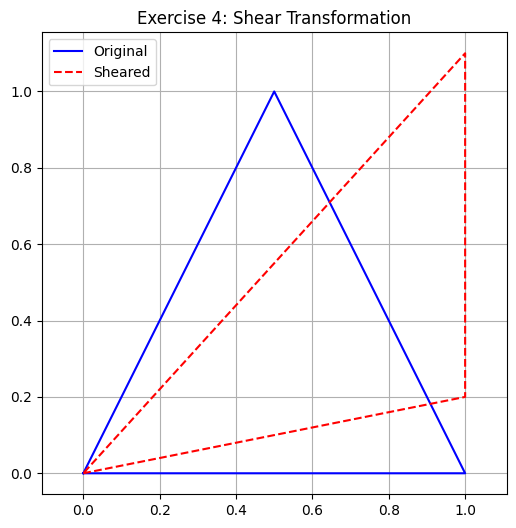

In [7]:
def shear(points, shx, shy):
    """Shear transformation"""
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0, 0, 1]])
    return (Sh @ points.T).T

triangle_sheared = shear(triangle, 0.5, 0.2)

print("Sheared Triangle Coordinates:\n", triangle_sheared)

# Plot
plt.figure(figsize=(6,6))
plt.plot(triangle[:,0], triangle[:,1], 'b-', label="Original")
plt.plot(triangle_sheared[:,0], triangle_sheared[:,1], 'r--', label="Sheared")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.title("Exercise 4: Shear Transformation")
plt.show()
